In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Load image without any change

In [2]:
img = cv.imread('chest-xray.png', cv.IMREAD_UNCHANGED)

In [3]:
img.shape

(493, 600)

### It is already grayscale

In [4]:
type(img)

numpy.ndarray

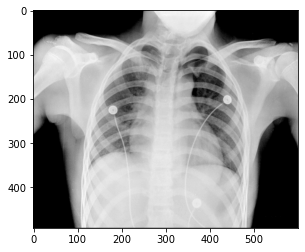

In [5]:
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)

In [6]:
img.dtype

dtype('uint8')

### Determine the memory occupied by the grayscale image

In [7]:
print(f'{img.nbytes / 1000} KB')

295.8 KB


### Crop and display the left half of the chest X-ray image.

In [120]:
cropped_gray_image = img[:, :img.shape[1] // 2]

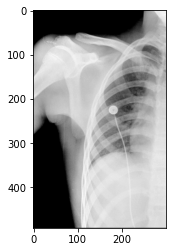

In [121]:
plt.imshow(cropped_gray_image, cmap = 'gray', vmin = 0, vmax = 255)

### Flip the cropped grayscale image along the x-axis and display it.

In [122]:
flipped_x_axis = cv.flip(cropped_gray_image, 0)

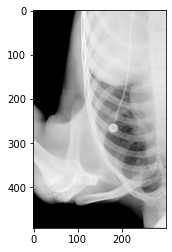

In [123]:
plt.imshow(flipped_x_axis, cmap = 'gray', vmin = 0, vmax = 255)

### Create a 2x3 subplot layout for image analysis.
  - **Row 1:** Display three versions of a grayscale image.
    - **Column 1:** Original image.
    - **Column 2:** Cropped to show the left half.
    - **Column 3:** Cropped and flipped along the x-axis.
  - **Row 2:** Display histograms corresponding to the images in Row 1.

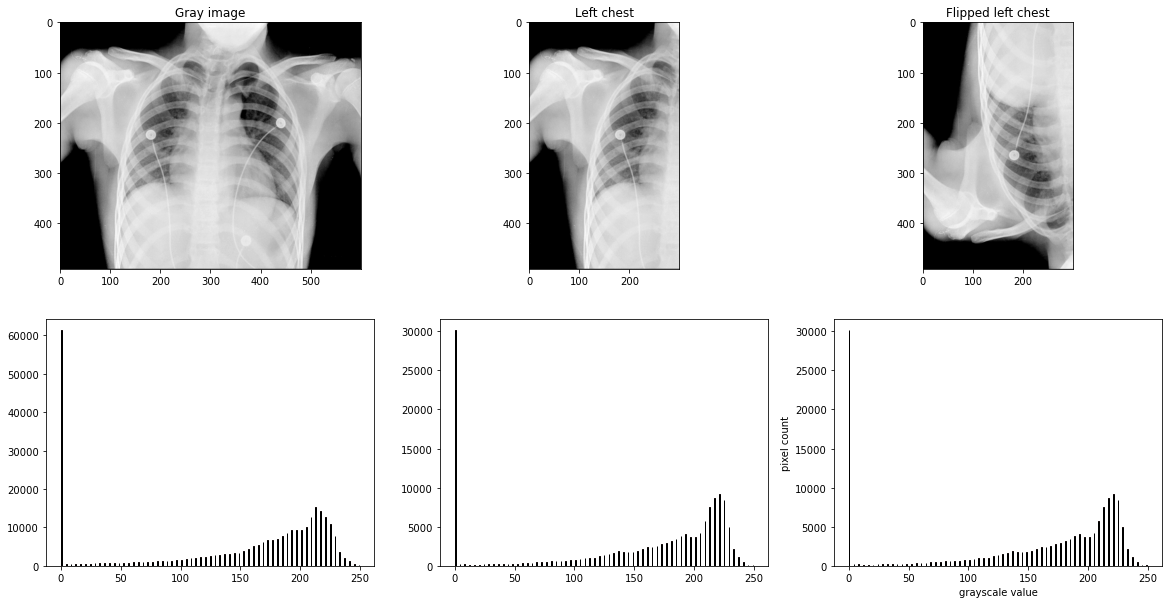

In [124]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
plt.xlabel("grayscale value")
plt.ylabel("pixel count")

# vmax = 2^8 - 1
ax[0][0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[0][0].set_title('Gray image')

ax[0][1].imshow(cropped_gray_image, cmap='gray', vmin = 0, vmax = 255)
ax[0][1].set_title('Left chest')

ax[0][2].imshow(flipped_x_axis, cmap='gray', vmin = 0, vmax = 255)
ax[0][2].set_title('Flipped left chest')

# configure and draw the histogram figure
# create the histogram
hist, bins = np.histogram(img, bins=int((img.max() - img.min())/4), range= (0, (img.max() - img.min())))
freq = hist/float(hist.sum())
ax[1][0].bar(bins[:-1], hist, width=0.6, align="edge", ec="k", color='red')
plt.ylabel("pixel count")

# create the histogram
hist, bins = np.histogram(cropped_gray_image, bins=int((cropped_gray_image.max() - cropped_gray_image.min())/4), range= (0, (cropped_gray_image.max() - cropped_gray_image.min())))
freq = hist/float(hist.sum())
ax[1][1].bar(bins[:-1], hist, width=0.6, align="edge", ec="k", color='red')
plt.ylabel("pixel count")

# create the histogram
hist, bins = np.histogram(flipped_x_axis, bins=int((flipped_x_axis.max() - flipped_x_axis.min())/4), range= (0, (flipped_x_axis.max() - flipped_x_axis.min())))
freq = hist/float(hist.sum())
ax[1][2].bar(bins[:-1], hist, width=0.6, align="edge", ec="k", color='red')
plt.ylabel("pixel count")

plt.show()

### Conclusion: Analyzing Histograms

From the resulting graphs, we can see that the number of pixels that have a certain value does not change with the change of the location of the pixels. This confirms that only the spatial arrangement of pixels has changed, not their intensity values, leading to identical histograms for the cropped and flipped images. 

Additionally, we conclude that the original image contains approximately twice the number of pixels as the cropped and flipped images. This observation aligns with the fact that the original image has twice the area, explaining why the values on the axes in the histogram for the original image are roughly double those for the cropped and flipped images.

In summary, the histograms serve as a quantitative measure that validates the image manipulations, suggesting that the operations have been performed correctly and that the image characteristics remain consistent.
